In [24]:
#! pip install gensim

In [25]:
#! pip install nltk

In [26]:
#! pip install stop-words

In [27]:
#! pip install pyLDAvis

In [28]:
import pandas as pd
import numpy as np 
import gensim  
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()
import nltk 
nltk.download('wordnet')
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\silva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df=pd.read_csv('Pre_processed.csv')

In [30]:
df.head(5)

,Unnamed: 0,Title,Instructions,Image_Name,Cleaned_Ingredients,Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","['salt', 'pepper', 'butter', 'flour', 'onion',..."
1,1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...","['salt', 'pepper', 'ground', 'black pepper', '..."
2,2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...","['salt', 'pepper', 'garlic', 'onion', 'ground'..."
3,3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...","['salt', 'butter', 'garlic', 'onion', 'olive o..."
4,4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","['butter', 'sugar', 'water', 'ground', 'lemon'..."


In [31]:
df.drop(labels=['Unnamed: 0','Ingredients'], axis=1, inplace=True)

In [32]:
df.head(5)

,Title,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                13485 non-null  object
 1   Instructions         13483 non-null  object
 2   Image_Name           13485 non-null  object
 3   Cleaned_Ingredients  13485 non-null  object
dtypes: object(4)
memory usage: 421.5+ KB


In [34]:
df['Cleaned_Ingredients'][0]

'[\'1 (3½–4-lb.) whole chicken\', \'2¾ tsp. kosher salt, divided, plus more\', \'2 small acorn squash (about 3 lb. total)\', \'2 Tbsp. finely chopped sage\', \'1 Tbsp. finely chopped rosemary\', \'6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature\', \'¼ tsp. ground allspice\', \'Pinch of crushed red pepper flakes\', \'Freshly ground black pepper\', \'⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)\', \'2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces\', \'2 Tbsp. extra-virgin olive oil\', \'½ small red onion, thinly sliced\', \'3 Tbsp. apple cider vinegar\', \'1 Tbsp. white miso\', \'¼ cup all-purpose flour\', \'2 Tbsp. unsalted butter, room temperature\', \'¼ cup dry white wine\', \'2 cups unsalted chicken broth\', \'2 tsp. white miso\', \'Kosher salt\', \'freshly ground pepper\']'

In [35]:
stemmer = SnowballStemmer('english')

In [36]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [37]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\silva\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
with np.load('data.npz', allow_pickle=True) as f:
    ingredients = f['ingredients']

In [39]:
ingredients.shape

(3500,)

In [40]:
processed = df['Cleaned_Ingredients'].map(preprocess)

In [41]:
processed 

0        [chicken, kosher, salt, divid, plus, small, ac...
1        [larg, white, pound, potato, inch, diamet, tea...
2        [evapor, milk, milk, garlic, powder, onion, po...
3        [pound, round, italian, loaf, inch, cub, cup, ...
4        [teaspoon, dark, brown, sugar, teaspoon, water...
                               ...                        
13480    [purpos, flour, unsweeten, cocoa, powder, teas...
13481    [preserv, lemon, pound, butternut, squash, pee...
13482    [leftov, katsuo, bushi, dri, bonito, flake, ma...
13483    [stick, plus, tablespoon, unsalt, butter, babi...
13484    [medium, larg, fresh, poblano, chile, tomato, ...
Name: Cleaned_Ingredients, Length: 13485, dtype: object

In [42]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')

In [43]:
processed2 = processed.apply(lambda x: list(set(x) & set(ingredients)))

In [44]:
df['words'] = processed2

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                13485 non-null  object
 1   Instructions         13483 non-null  object
 2   Image_Name           13485 non-null  object
 3   Cleaned_Ingredients  13485 non-null  object
 4   words                13485 non-null  object
dtypes: object(5)
memory usage: 526.9+ KB


In [46]:
df['words'].str.len() != 0

0        True
1        True
2        True
3        True
4        True
         ... 
13480    True
13481    True
13482    True
13483    True
13484    True
Name: words, Length: 13485, dtype: bool

In [47]:
df2 = df.loc[df['words'].str.len() != 0]

In [48]:
df2.reset_index(drop=True, inplace=True)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13474 entries, 0 to 13473
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                13474 non-null  object
 1   Instructions         13472 non-null  object
 2   Image_Name           13474 non-null  object
 3   Cleaned_Ingredients  13474 non-null  object
 4   words                13474 non-null  object
dtypes: object(5)
memory usage: 526.5+ KB


In [50]:
processed3 = df2['words']

In [51]:
processed3

0        [pepper, fresh, squash, chicken, black, wine, ...
1        [black, pepper, kosher, potato, white, parsley...
2        [cream, pepper, black, fresh, cheddar, kosher,...
3        [cream, butter, parmigiano, broth, stock, clov...
4        [garnish, butter, lemon, fresh, sugar, brown, ...
                               ...                        
13469    [extract, butter, cream, egg, sugar, flour, co...
13470    [nut, pasta, fresh, raisin, toast, couscous, p...
13471    [bonito, fresh, toast, grain, sugar, rice, das...
13472       [nutmeg, butter, fresh, phyllo, plus, spinach]
13473    [fresh, toast, soft, black, sugar, chile, garn...
Name: words, Length: 13474, dtype: object

In [52]:
filter = ['tablespoon', 'teaspoon', 'extract', 'extra', 'fresh', 'plus', 'kosher', 'instant', 'espresso', 'white', 'brown', 'black', 'pink', 'orange', 'green', 'blue', 'yellow', 'red']

In [53]:
processed3 = processed3.apply(lambda x: list(set(x) - set(filter)))

In [54]:
df2['words'] = processed3

C:\Users\silva\AppData\Local\Temp/ipykernel_3028/1055242072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['words'] = processed3


In [55]:
dictionary = gensim.corpora.Dictionary(processed3)

In [56]:
bow_corpus = [dictionary.doc2bow(x) for x in processed3]
bow_corpus[4310]

[(10, 1), (18, 1), (21, 1), (23, 1), (332, 1)]

In [57]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(8, 1), (10, 1), (14, 1), (15, 1), (16, 1)],
 [(7, 1),
  (8, 1),
  (10, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(1, 1),
  (2, 1),
  (3, 1),
  (7, 1),
  (14, 1),
  (18, 1),
  (19, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(2, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [(35, 1), (38, 1), (39, 1)],
 [(2, 1), (4, 1), (10, 1), (34, 1), (35, 1), (40, 1)],
 [(32, 1), (34, 1), (35, 1), (36, 1), (41, 1), (42, 1)],
 [(7, 1),
  (8, 1),
  (10, 1),
  (19, 1),
  (25, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(2, 1),
  (7, 1),
  (8, 1),
  (10, 1),
  (14, 1),
  (26, 1),
  (47, 1),
  (57, 1),
  (58, 1),
  (59, 1)],
 [(8, 1),
  (1

In [58]:
bow_doc_4310 = bow_corpus[4310] 
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 10 ("salt") appears 1 time.
Word 18 ("cream") appears 1 time.
Word 21 ("milk") appears 1 time.
Word 23 ("powder") appears 1 time.
Word 332 ("gelatin") appears 1 time.


In [59]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

In [60]:
corpus_tfidf = tfidf[bow_corpus]

In [61]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2769261252753749),
 (1, 0.2633808677141256),
 (2, 0.11656877958508288),
 (3, 0.21040493948752617),
 (4, 0.3451473351641481),
 (5, 0.1607653719335641),
 (6, 0.4809451075597364),
 (7, 0.14843058108396442),
 (8, 0.09523632822991754),
 (9, 0.3898886533133801),
 (10, 0.04094715513657398),
 (11, 0.39996449105498755),
 (12, 0.1825289555213423),
 (13, 0.20426378934454625)]


In [62]:
len(bow_corpus[30])

6

In [69]:
from gensim.models.coherencemodel import CoherenceModel
    
for i in range(1,31):
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary)
    cm = CoherenceModel(model=lda_model, corpus=bow_corpus, coherence='u_mass')
    print(i,"topics:", cm.get_coherence())
    
#13 topics

1 topics: -2.0036409112448923
2 topics: -2.065917580562893
3 topics: -2.1128397912212136
4 topics: -2.071011066767462
5 topics: -2.0311797331000503
6 topics: -2.0954794414107916
7 topics: -2.12454652567677
8 topics: -2.0617611684238386
9 topics: -2.087735992493312
10 topics: -2.058453838520156
11 topics: -2.11125215965648
12 topics: -2.045356028252366
13 topics: -2.114330574473581
14 topics: -2.057998344094576
15 topics: -2.0710905599399854
16 topics: -2.0620688794089532
17 topics: -2.093941439376211
18 topics: -2.076507243021228
19 topics: -2.042860245441004
20 topics: -2.10637580745388
21 topics: -2.0485891464505483
22 topics: -2.049030198894052
23 topics: -2.081544278928845
24 topics: -2.0531623508566423
25 topics: -2.0965872947666067
26 topics: -2.0207178362374445
27 topics: -2.0853106260971543
28 topics: -2.0451249724455085
29 topics: -2.060631203735207
30 topics: -2.0534572057114593


In [70]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, workers=2, random_state=15)

In [71]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.060*"salt" + 0.053*"garlic" + 0.050*"pepper" + 0.046*"clove" + 0.040*"onion" + 0.025*"tomato" + 0.025*"butter" + 0.022*"parsley" + 0.021*"water" + 0.019*"potato"
Topic: 1 
Words: 0.058*"sugar" + 0.049*"butter" + 0.048*"salt" + 0.032*"water" + 0.027*"flour" + 0.023*"cream" + 0.022*"clove" + 0.022*"lemon" + 0.020*"garlic" + 0.019*"cinnamon"
Topic: 2 
Words: 0.078*"salt" + 0.053*"sugar" + 0.042*"butter" + 0.041*"flour" + 0.034*"pepper" + 0.032*"powder" + 0.031*"cream" + 0.030*"egg" + 0.030*"lemon" + 0.029*"milk"
Topic: 3 
Words: 0.074*"salt" + 0.052*"pepper" + 0.036*"butter" + 0.032*"onion" + 0.030*"garlic" + 0.028*"vinegar" + 0.026*"wine" + 0.026*"lemon" + 0.024*"sugar" + 0.019*"tomato"
Topic: 4 
Words: 0.051*"sugar" + 0.043*"salt" + 0.043*"garlic" + 0.034*"clove" + 0.030*"lime" + 0.027*"ginger" + 0.026*"water" + 0.024*"pepper" + 0.022*"chile" + 0.019*"flour"


In [72]:
processed3[4310]

['cream', 'gelatin', 'milk', 'powder', 'salt']

In [73]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8649414777755737	 
Topic: 0.078*"salt" + 0.053*"sugar" + 0.042*"butter" + 0.041*"flour" + 0.034*"pepper" + 0.032*"powder" + 0.031*"cream" + 0.030*"egg" + 0.030*"lemon" + 0.029*"milk"

Score: 0.03384346514940262	 
Topic: 0.058*"sugar" + 0.049*"butter" + 0.048*"salt" + 0.032*"water" + 0.027*"flour" + 0.023*"cream" + 0.022*"clove" + 0.022*"lemon" + 0.020*"garlic" + 0.019*"cinnamon"

Score: 0.03377996012568474	 
Topic: 0.060*"salt" + 0.053*"garlic" + 0.050*"pepper" + 0.046*"clove" + 0.040*"onion" + 0.025*"tomato" + 0.025*"butter" + 0.022*"parsley" + 0.021*"water" + 0.019*"potato"

Score: 0.03375416621565819	 
Topic: 0.051*"sugar" + 0.043*"salt" + 0.043*"garlic" + 0.034*"clove" + 0.030*"lime" + 0.027*"ginger" + 0.026*"water" + 0.024*"pepper" + 0.022*"chile" + 0.019*"flour"

Score: 0.03368093818426132	 
Topic: 0.074*"salt" + 0.052*"pepper" + 0.036*"butter" + 0.032*"onion" + 0.030*"garlic" + 0.028*"vinegar" + 0.026*"wine" + 0.026*"lemon" + 0.024*"sugar" + 0.019*"tomato"


In [74]:
vis_data = gensimvis.prepare(lda_model, bow_corpus, dictionary)

C:\Users\silva\anaconda3\envs\dsaa\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [75]:
pyLDAvis.display(vis_data)

In [76]:
def format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=df2['words']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=df2['words'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9375,"salt, pepper, butter, onion, garlic, vinegar, ...","[pepper, wine, butter, sage, vinegar, bread, m..."
1,1,0.0,0.8633,"salt, garlic, pepper, clove, onion, tomato, bu...","[pepper, potato, parsley, salt, thyme]"
2,2,2.0,0.6164,"salt, sugar, butter, flour, pepper, powder, cr...","[cream, pepper, cheddar, milk, paprika, macaro..."
3,3,0.0,0.9452,"salt, garlic, pepper, clove, onion, tomato, bu...","[cream, butter, parmigiano, broth, stock, clov..."
4,4,1.0,0.8984,"sugar, butter, salt, water, flour, cream, clov...","[garnish, butter, lemon, sugar, bourbon, cinna..."
5,5,1.0,0.7964,"sugar, butter, salt, water, flour, cream, clov...","[tequila, lemon, reposado]"
6,6,1.0,0.8833,"sugar, butter, salt, water, flour, cream, clov...","[garnish, butter, cider, peppercorn, lemon, salt]"
7,7,1.0,0.8840,"sugar, butter, salt, water, flour, cream, clov...","[garnish, sugar, syrup, scotch, bourbon, lemon]"
8,8,0.0,0.6250,"salt, garlic, pepper, clove, onion, tomato, bu...","[pepper, lamb, barley, lime, rice, masala, sha..."
9,9,3.0,0.9254,"salt, pepper, butter, onion, garlic, vinegar, ...","[pepper, butter, ghee, tomato, cumin, soup, eg..."


In [143]:
df_dominant_topic['Keywords'][0]

'salt, pepper, butter, onion, garlic, vinegar, wine, lemon, sugar, tomato'

In [78]:
df_labels=df_dominant_topic.iloc[:,1:4]

In [80]:
final_df = pd.concat([df2, df_labels], axis=1)

#final_df.drop(columns='labels',inplace=True)
final_df.rename(columns={'Dominant_Topic':'labels'},inplace=True)

In [81]:
final_df['labels']=final_df['labels'].apply(lambda x:x+1) 
final_df['labels']=final_df['labels'].astype(int)
final_df['labels'].unique()

array([4, 1, 3, 2, 5])

In [82]:
final_df.head(5)  #USAR FINAL DF

,Title,Instructions,Image_Name,Cleaned_Ingredients,words,labels,Topic_Perc_Contrib,Keywords
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","[pepper, wine, butter, sage, vinegar, bread, m...",4,0.9375,"salt, pepper, butter, onion, garlic, vinegar, ..."
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...","[pepper, potato, parsley, salt, thyme]",1,0.8633,"salt, garlic, pepper, clove, onion, tomato, bu..."
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...","[cream, pepper, cheddar, milk, paprika, macaro...",3,0.6164,"salt, sugar, butter, flour, pepper, powder, cr..."
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...","[cream, butter, parmigiano, broth, stock, clov...",1,0.9452,"salt, garlic, pepper, clove, onion, tomato, bu..."
4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","[garnish, butter, lemon, sugar, bourbon, cinna...",2,0.8984,"sugar, butter, salt, water, flour, cream, clov..."


In [83]:
final_df.groupby('labels')['labels'].count()

labels
1    2601
2    2282
3    3375
4    3720
5    1496
Name: labels, dtype: int64

IndexError: list index out of range

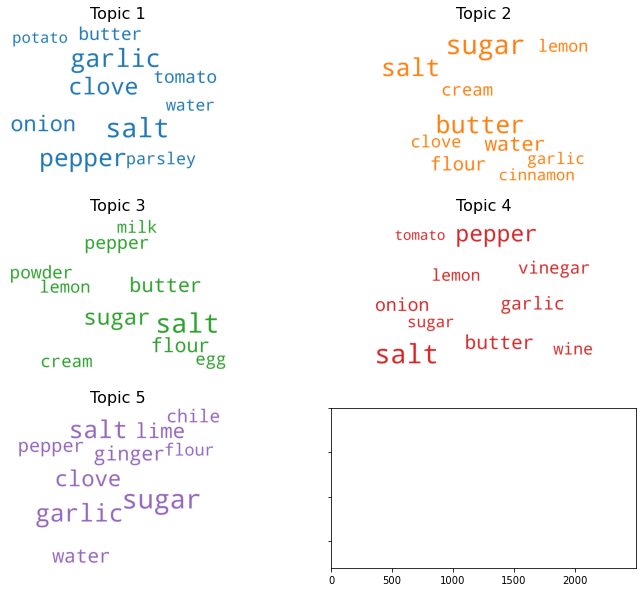

In [87]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(12,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
0
1
2
3
4
5


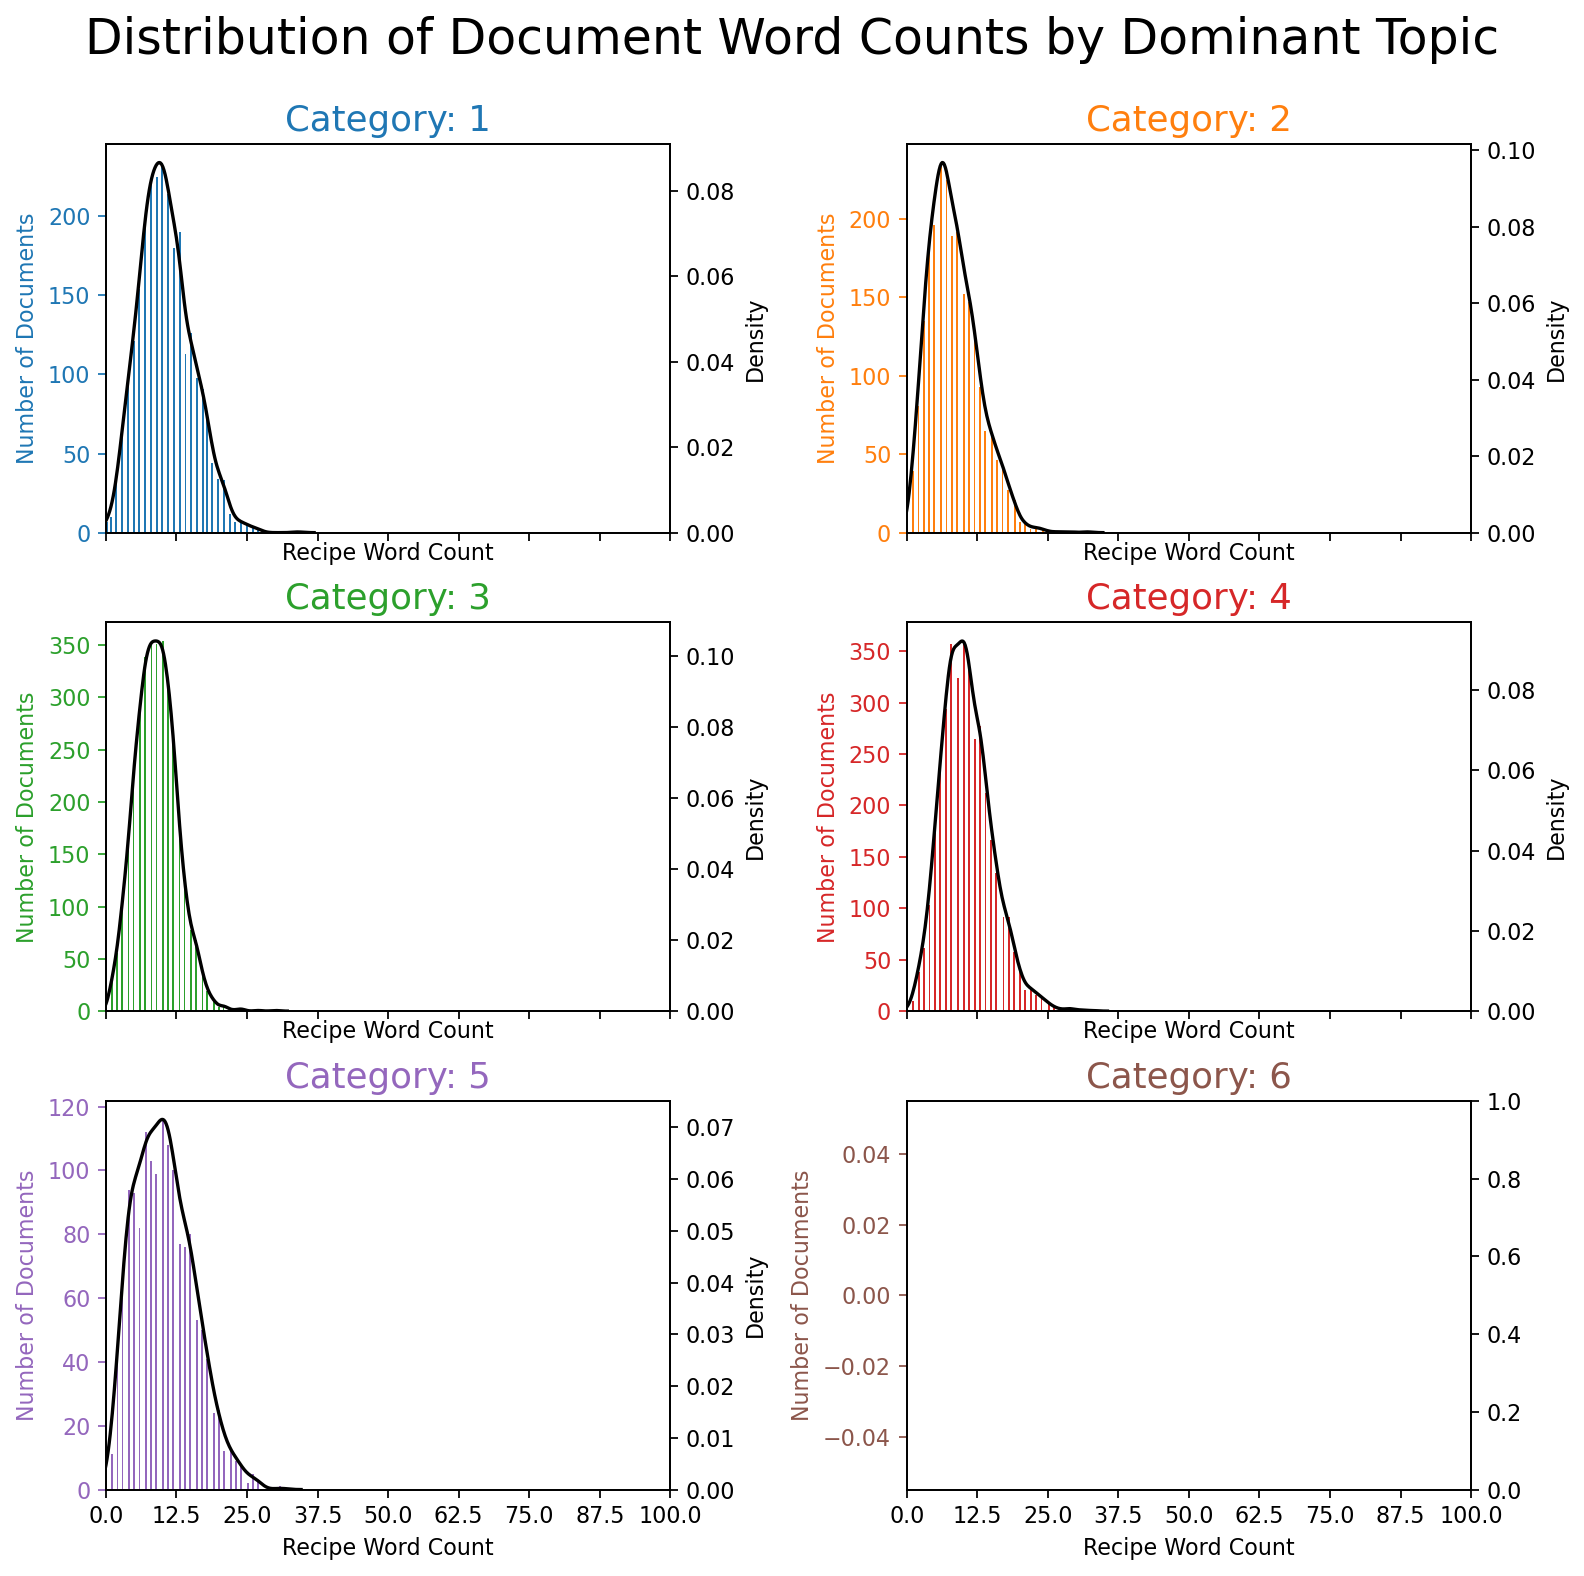

In [107]:
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,2,figsize=(10,10), dpi=160,sharex=True)

print(axes)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    print(i)
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Recipe Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Category: '+str(i+1), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))

fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

C:\Users\silva\AppData\Local\Temp/ipykernel_3028/2490074390.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\silva\AppData\Local\Temp/ipykernel_3028/2490074390.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\silva\AppData\Local\Temp/ipykernel_3028/2490074390.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\silva\AppData\Local\Temp/ipykernel_3028/2490074390.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


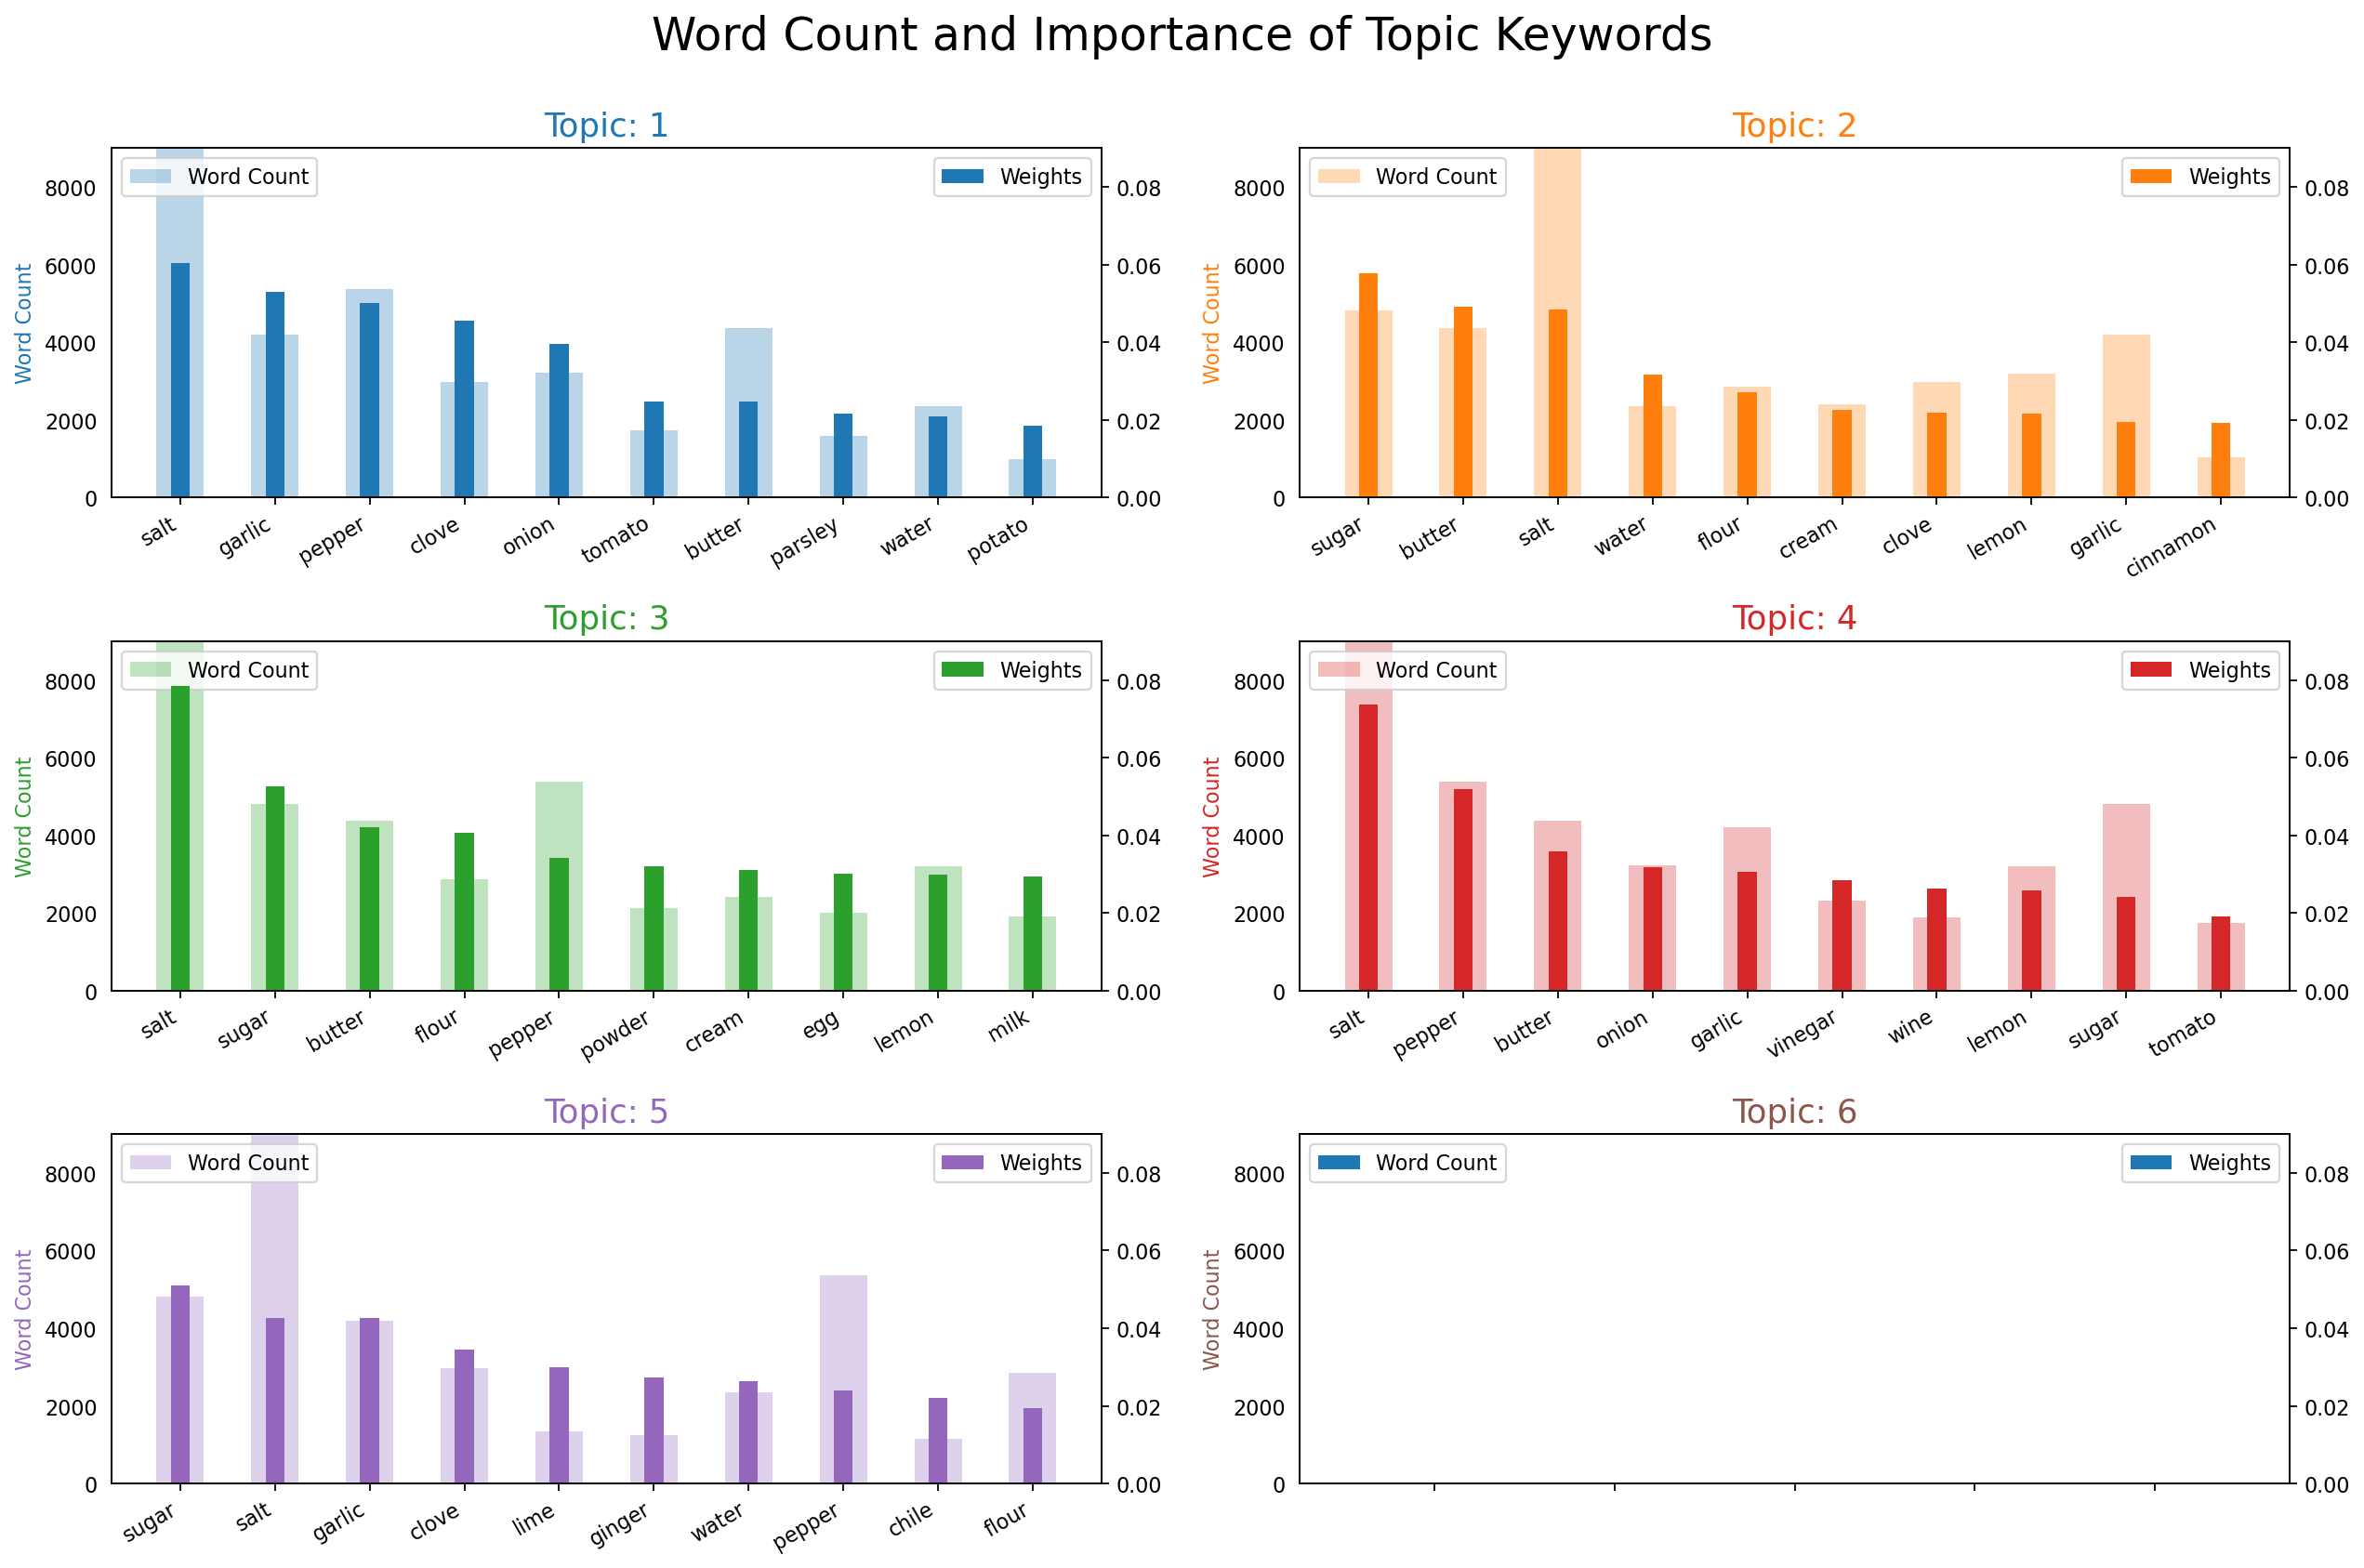

In [141]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in processed2 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.09); ax.set_ylim(0, 9000)
    ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [159]:
final_df

,Title,Instructions,Image_Name,Cleaned_Ingredients,words,labels,Topic_Perc_Contrib,Keywords
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","[pepper, wine, butter, sage, vinegar, bread, m...",4,0.9375,"salt, pepper, butter, onion, garlic, vinegar, ..."
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...","[pepper, potato, parsley, salt, thyme]",1,0.8633,"salt, garlic, pepper, clove, onion, tomato, bu..."
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...","[cream, pepper, cheddar, milk, paprika, macaro...",3,0.6164,"salt, sugar, butter, flour, pepper, powder, cr..."
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...","[cream, butter, parmigiano, broth, stock, clov...",1,0.9452,"salt, garlic, pepper, clove, onion, tomato, bu..."
4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","[garnish, butter, lemon, sugar, bourbon, cinna...",2,0.8984,"sugar, butter, salt, water, flour, cream, clov..."
...,...,...,...,...,...,...,...,...
13469,Brownie Pudding Cake,Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten...","[cream, butter, egg, sugar, flour, cocoa, salt...",3,0.9375,"salt, sugar, butter, flour, pepper, powder, cr..."
13470,Israeli Couscous with Roasted Butternut Squash...,Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s...","[nut, pasta, raisin, toast, couscous, pepperco...",1,0.9372,"salt, garlic, pepper, clove, onion, tomato, bu..."
13471,Rice with Soy-Glazed Bonito Flakes and Sesame ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...,"[bonito, grain, toast, sugar, rice, dashi, wat...",5,0.9089,"sugar, salt, garlic, clove, lime, ginger, wate..."
13472,Spanakopita,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,"[phyllo, nutmeg, spinach, butter]",2,0.8364,"sugar, butter, salt, water, flour, cream, clov..."


In [169]:
final_df[(final_df['Image_Name'] == 'the-ultimate-hamburger-232191') |(final_df['Title'] == "Newton's Law")]

,Title,Instructions,Image_Name,Cleaned_Ingredients,words,labels,Topic_Perc_Contrib,Keywords
4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","[garnish, butter, lemon, sugar, bourbon, cinna...",2,0.8984,"sugar, butter, salt, water, flour, cream, clov..."
12489,The Ultimate Hamburger,1. Set up the grill for direct grilling and pr...,the-ultimate-hamburger-232191,"['1 1/4 pounds ground chuck', '1 1/4 pounds gr...","[pepper, butter, bread, tomato, sirloin, chuck...",4,0.9184,"salt, pepper, butter, onion, garlic, vinegar, ..."
